# Curso de Visualização da IBM
## Grafico pizza

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## O arquivo para criação do dataframe e encontrada no link fornecido no formato xlsx
### O arquivo excel ate a linha 20 e ocupado por uma imagem, logo nos interessa buscar a partir da linha 20

In [21]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## O comando drop retira as colunas que não serão necessarias

In [22]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Renomeia as colunas odName, AreaName, RegName
## Coloca a coluna renomeada country como indice do dataframe

In [23]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.set_index('Country', inplace=True)

df_can['total'] = df_can.sum(axis=1)
df_can.sort_values(['total'], ascending = False, axis = 0, inplace = True)


In [24]:
df_continental = df_can.groupby('Continent', axis = 0).sum()


## Cria a variavel years com todas das colunas dos anos que vamos precisar para gerar o grafico de caixa

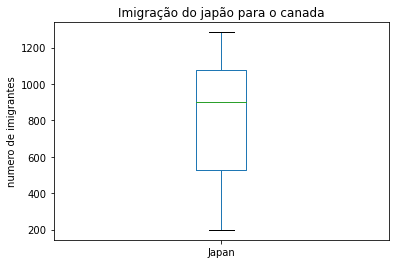

In [33]:
years = list(map(int, range(1980, 2014)))

japao = df_can.loc['Japan', years]

japao.plot(kind = 'box')

plt.title("Imigração do japão para o canada")
plt.ylabel("numero de imigrantes")


plt.show()